# Text Prepocessing 
# Data Tweet Topik PPN 12 %

## import Dependencies

In [1]:
import nltk
import spacy
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import pandas as pd

In [2]:
# setting table pandas interface
pd.options.display.max_colwidth = 200
pd.options.display.max_colwidth = 200

In [3]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\farha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\farha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\farha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\farha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Read data

In [4]:
df = pd.read_csv("dataset\PPN.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\farha\AppData\Local\Temp\ipykernel_32548\1912869271.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("dataset\PPN.csv")


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1873869673743491336,Mon Dec 30 23:54:34 +0000 2024,0,@likromiahooy Paginya ppn naik 12%,1873880391230333420,NaN,likromiahooy,in,NaN,0,0,0,https://x.com/nwotariz/status/1873880391230333420,1313516922353283073,nwotariz
1,1873538051047334049,Mon Dec 30 23:50:29 +0000 2024,2,@AdamVelcro 1. Krn sudah dikondisikan di media kalau kenaikan ppn 12% diinisiasi PDIP. Jadi dia berharap kalau tetap naik rakyat akan semakin ga suka dg PDIP. 2. Ini pemerintahan Prabowo. Jadi dia...,1873879360413065392,NaN,AdamVelcro,in,most beautiful place on earth,0,1,0,https://x.com/staysaferek/status/1873879360413065392,932657813930721280,staysaferek
2,1873758639783289310,Mon Dec 30 23:49:49 +0000 2024,0,@exhumaclown rapat ppn krn naik jadi 12% kah?,1873879192255013092,NaN,exhumaclown,in,she/her,0,1,0,https://x.com/ikeulabs/status/1873879192255013092,768414071137775616,ikeulabs
3,1873878259844419990,Mon Dec 30 23:46:06 +0000 2024,0,Apakah ini hari pemborosan sebelum ppn naik 12%?,1873878259844419990,NaN,NaN,in,🇮🇩,1,1,0,https://x.com/flyashh/status/1873878259844419990,997760451592183808,flyashh
4,1873702424453796059,Mon Dec 30 23:33:38 +0000 2024,0,@kompascom Kl pabrik / usaha nya yg memproduksi produk pangan tersebut kena ppn 12% ya berpotensi scr tdk lgs akan naik jg harganya pak..,1873875120198197421,NaN,kompascom,in,NaN,0,0,0,https://x.com/RamsDews/status/1873875120198197421,1714509511883628544,RamsDews


## Get subsest Text
karena hanya ingin menggunakan text column saja

In [5]:
data = df[['full_text']].copy()

In [6]:
data

,full_text
0,@likromiahooy Paginya ppn naik 12%
1,@AdamVelcro 1. Krn sudah dikondisikan di media kalau kenaikan ppn 12% diinisiasi PDIP. Jadi dia berharap kalau tetap naik rakyat akan semakin ga suka dg PDIP. 2. Ini pemerintahan Prabowo. Jadi dia...
2,@exhumaclown rapat ppn krn naik jadi 12% kah?
3,Apakah ini hari pemborosan sebelum ppn naik 12%?
4,@kompascom Kl pabrik / usaha nya yg memproduksi produk pangan tersebut kena ppn 12% ya berpotensi scr tdk lgs akan naik jg harganya pak..
...,...
306,Udah pasrah dan nrimo ing pandum nek PPN bakal ttp naik jadi 12% hore
307,Yang bilang ppn 12% cuma menyasar barang mewah doang nih dibaca. Harga bahan pokok lain udah mulai naik bahkan sebelum 2025 tahun depan bisa jadi harga bahan lain ikutan naik
308,kalo ppn naik 12% apakah ini tandanya aku harus minta kenaikan duit bulanan 12%
309,@abu_waras Kalopun ppn tetep naik 12% setidaknya duit negara bisa digunakan untuk kepentingan masyarakat yg lebih penting ga kepotong program asbun makan siang gratis ada kemungkinan juga umr baka...


## Case Folding

In [7]:
data['lower_case'] = data['full_text'].str.lower()
data.sample(5)

,full_text,lower_case
45,Emosi sendiri ortu bebal banget dibilangin PPN naik 12% itu hampir seluruh barang kocak,emosi sendiri ortu bebal banget dibilangin ppn naik 12% itu hampir seluruh barang kocak
160,Polemik PPN Naik 12 Persen Begini Tanggapan Jokowi #Polemik #PPN #12Persen #Jokowi https://t.co/It31WQClpe,polemik ppn naik 12 persen begini tanggapan jokowi #polemik #ppn #12persen #jokowi https://t.co/it31wqclpe
217,penutup 2024 -Suaminya dewi sandra koruptor tp hukumannya cuman 6tahun -uang palsu -PPN naik 12% -ada flu baru dari china influenza A etc -terus td gw baca apalagi y?,penutup 2024 -suaminya dewi sandra koruptor tp hukumannya cuman 6tahun -uang palsu -ppn naik 12% -ada flu baru dari china influenza a etc -terus td gw baca apalagi y?
235,@DitjenPajakRI Pajak naik buat ngegaji org² bodoh macam kalian gimana rakyat ga geramm masih mau bela diri kenaikan PPN 12% gaakan berpengaruh pada konsumen aduhhh dikira rakyat nya bego semua kal...,@ditjenpajakri pajak naik buat ngegaji org² bodoh macam kalian gimana rakyat ga geramm masih mau bela diri kenaikan ppn 12% gaakan berpengaruh pada konsumen aduhhh dikira rakyat nya bego semua kal...
154,@UmarHasibuan__ Sebenernya kan elo yg naikin ppn dari 10 ke 11 sekarang naik ke 12 Lo emng biang keladi,@umarhasibuan__ sebenernya kan elo yg naikin ppn dari 10 ke 11 sekarang naik ke 12 lo emng biang keladi


## Remove HTML Tags
Karena ini adalah hasil scarpping maka HTML tag sering muncul

In [8]:
import re

def remove_html_tag(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

data['lower_case'] = data['lower_case'].apply(remove_html_tag)
data.head()

,full_text,lower_case
0,@likromiahooy Paginya ppn naik 12%,@likromiahooy paginya ppn naik 12%
1,@AdamVelcro 1. Krn sudah dikondisikan di media kalau kenaikan ppn 12% diinisiasi PDIP. Jadi dia berharap kalau tetap naik rakyat akan semakin ga suka dg PDIP. 2. Ini pemerintahan Prabowo. Jadi dia...,@adamvelcro 1. krn sudah dikondisikan di media kalau kenaikan ppn 12% diinisiasi pdip. jadi dia berharap kalau tetap naik rakyat akan semakin ga suka dg pdip. 2. ini pemerintahan prabowo. jadi dia...
2,@exhumaclown rapat ppn krn naik jadi 12% kah?,@exhumaclown rapat ppn krn naik jadi 12% kah?
3,Apakah ini hari pemborosan sebelum ppn naik 12%?,apakah ini hari pemborosan sebelum ppn naik 12%?
4,@kompascom Kl pabrik / usaha nya yg memproduksi produk pangan tersebut kena ppn 12% ya berpotensi scr tdk lgs akan naik jg harganya pak..,@kompascom kl pabrik / usaha nya yg memproduksi produk pangan tersebut kena ppn 12% ya berpotensi scr tdk lgs akan naik jg harganya pak..


## Remove URLs

Di twitter sendiri orang sering mengqoute twit orang lain yang mana itu sebenarya jika kita lihat maka pen-ngeqoute twit itu menulis URL dari post orang lain

In [9]:
def remove_urls(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

data['lower_case'] = data['lower_case'].apply(remove_urls)
data.head()

,full_text,lower_case
0,@likromiahooy Paginya ppn naik 12%,@likromiahooy paginya ppn naik 12%
1,@AdamVelcro 1. Krn sudah dikondisikan di media kalau kenaikan ppn 12% diinisiasi PDIP. Jadi dia berharap kalau tetap naik rakyat akan semakin ga suka dg PDIP. 2. Ini pemerintahan Prabowo. Jadi dia...,@adamvelcro 1. krn sudah dikondisikan di media kalau kenaikan ppn 12% diinisiasi pdip. jadi dia berharap kalau tetap naik rakyat akan semakin ga suka dg pdip. 2. ini pemerintahan prabowo. jadi dia...
2,@exhumaclown rapat ppn krn naik jadi 12% kah?,@exhumaclown rapat ppn krn naik jadi 12% kah?
3,Apakah ini hari pemborosan sebelum ppn naik 12%?,apakah ini hari pemborosan sebelum ppn naik 12%?
4,@kompascom Kl pabrik / usaha nya yg memproduksi produk pangan tersebut kena ppn 12% ya berpotensi scr tdk lgs akan naik jg harganya pak..,@kompascom kl pabrik / usaha nya yg memproduksi produk pangan tersebut kena ppn 12% ya berpotensi scr tdk lgs akan naik jg harganya pak..


## Remove Punctuations


In [10]:
exclude = '!"$%&\'()*+,-/:;<=>?[\\]^_`{|}~.'  # Exclude full stop to retain sentence structure
def remove_punctuation_optimized(text):
    return text.translate(str.maketrans('', '', exclude))

data['lower_case'] = data['lower_case'].apply(remove_punctuation_optimized)
data.head()

,full_text,lower_case
0,@likromiahooy Paginya ppn naik 12%,@likromiahooy paginya ppn naik 12
1,@AdamVelcro 1. Krn sudah dikondisikan di media kalau kenaikan ppn 12% diinisiasi PDIP. Jadi dia berharap kalau tetap naik rakyat akan semakin ga suka dg PDIP. 2. Ini pemerintahan Prabowo. Jadi dia...,@adamvelcro 1 krn sudah dikondisikan di media kalau kenaikan ppn 12 diinisiasi pdip jadi dia berharap kalau tetap naik rakyat akan semakin ga suka dg pdip 2 ini pemerintahan prabowo jadi dia berha...
2,@exhumaclown rapat ppn krn naik jadi 12% kah?,@exhumaclown rapat ppn krn naik jadi 12 kah
3,Apakah ini hari pemborosan sebelum ppn naik 12%?,apakah ini hari pemborosan sebelum ppn naik 12
4,@kompascom Kl pabrik / usaha nya yg memproduksi produk pangan tersebut kena ppn 12% ya berpotensi scr tdk lgs akan naik jg harganya pak..,@kompascom kl pabrik usaha nya yg memproduksi produk pangan tersebut kena ppn 12 ya berpotensi scr tdk lgs akan naik jg harganya pak


## Slang replace

In [11]:
import indoNLP

In [12]:
def remove_slang_indo(text):
    return indoNLP.preprocessing.replace_slang(text)

In [13]:
data['remove_slang'] = data['lower_case'].apply(remove_slang_indo)
data.head()

,full_text,lower_case,remove_slang
0,@likromiahooy Paginya ppn naik 12%,@likromiahooy paginya ppn naik 12,@likromiahooy paginya ppn naik 12
1,@AdamVelcro 1. Krn sudah dikondisikan di media kalau kenaikan ppn 12% diinisiasi PDIP. Jadi dia berharap kalau tetap naik rakyat akan semakin ga suka dg PDIP. 2. Ini pemerintahan Prabowo. Jadi dia...,@adamvelcro 1 krn sudah dikondisikan di media kalau kenaikan ppn 12 diinisiasi pdip jadi dia berharap kalau tetap naik rakyat akan semakin ga suka dg pdip 2 ini pemerintahan prabowo jadi dia berha...,@adamvelcro 1 karena sudah dikondisikan di media kalau kenaikan ppn 12 diinisiasi pdip jadi dia berharap kalau tetap naik rakyat akan semakin enggak suka dengan pdip 2 ini pemerintahan prabowo jad...
2,@exhumaclown rapat ppn krn naik jadi 12% kah?,@exhumaclown rapat ppn krn naik jadi 12 kah,@exhumaclown rapat ppn karena naik jadi 12 kah
3,Apakah ini hari pemborosan sebelum ppn naik 12%?,apakah ini hari pemborosan sebelum ppn naik 12,apakah ini hari pemborosan sebelum ppn naik 12
4,@kompascom Kl pabrik / usaha nya yg memproduksi produk pangan tersebut kena ppn 12% ya berpotensi scr tdk lgs akan naik jg harganya pak..,@kompascom kl pabrik usaha nya yg memproduksi produk pangan tersebut kena ppn 12 ya berpotensi scr tdk lgs akan naik jg harganya pak,@kompascom kalo pabrik usaha nya yang memproduksi produk pangan tersebut kena ppn 12 ya berpotensi secara tidak langsung akan naik juga harganya pak


# Word Elongation
Mengganti word elongation yang terdapat pada sebuah teks.

In [14]:
def word_elongation(text):
    return indoNLP.preprocessing.replace_word_elongation(text)

In [15]:
data['remove_elongation'] = data['remove_slang'].apply(word_elongation)
data.head()

,full_text,lower_case,remove_slang,remove_elongation
0,@likromiahooy Paginya ppn naik 12%,@likromiahooy paginya ppn naik 12,@likromiahooy paginya ppn naik 12,@likromiahooy paginya ppn naik 12
1,@AdamVelcro 1. Krn sudah dikondisikan di media kalau kenaikan ppn 12% diinisiasi PDIP. Jadi dia berharap kalau tetap naik rakyat akan semakin ga suka dg PDIP. 2. Ini pemerintahan Prabowo. Jadi dia...,@adamvelcro 1 krn sudah dikondisikan di media kalau kenaikan ppn 12 diinisiasi pdip jadi dia berharap kalau tetap naik rakyat akan semakin ga suka dg pdip 2 ini pemerintahan prabowo jadi dia berha...,@adamvelcro 1 karena sudah dikondisikan di media kalau kenaikan ppn 12 diinisiasi pdip jadi dia berharap kalau tetap naik rakyat akan semakin enggak suka dengan pdip 2 ini pemerintahan prabowo jad...,@adamvelcro 1 karena sudah dikondisikan di media kalau kenaikan ppn 12 diinisiasi pdip jadi dia berharap kalau tetap naik rakyat akan semakin enggak suka dengan pdip 2 ini pemerintahan prabowo jad...
2,@exhumaclown rapat ppn krn naik jadi 12% kah?,@exhumaclown rapat ppn krn naik jadi 12 kah,@exhumaclown rapat ppn karena naik jadi 12 kah,@exhumaclown rapat ppn karena naik jadi 12 kah
3,Apakah ini hari pemborosan sebelum ppn naik 12%?,apakah ini hari pemborosan sebelum ppn naik 12,apakah ini hari pemborosan sebelum ppn naik 12,apakah ini hari pemborosan sebelum ppn naik 12
4,@kompascom Kl pabrik / usaha nya yg memproduksi produk pangan tersebut kena ppn 12% ya berpotensi scr tdk lgs akan naik jg harganya pak..,@kompascom kl pabrik usaha nya yg memproduksi produk pangan tersebut kena ppn 12 ya berpotensi scr tdk lgs akan naik jg harganya pak,@kompascom kalo pabrik usaha nya yang memproduksi produk pangan tersebut kena ppn 12 ya berpotensi secara tidak langsung akan naik juga harganya pak,@kompascom kalo pabrik usaha nya yang memproduksi produk pangan tersebut kena ppn 12 ya berpotensi secara tidak langsung akan naik juga harganya pak


## handling emoji
emoji to word

In [16]:
def emoji_to_text(text):
    return indoNLP.preprocessing.emoji_to_words(text)

In [17]:
data['emoji_to_text'] = data['remove_elongation'].apply(emoji_to_text)
data.head()

,full_text,lower_case,remove_slang,remove_elongation,emoji_to_text
0,@likromiahooy Paginya ppn naik 12%,@likromiahooy paginya ppn naik 12,@likromiahooy paginya ppn naik 12,@likromiahooy paginya ppn naik 12,@likromiahooy paginya ppn naik 12
1,@AdamVelcro 1. Krn sudah dikondisikan di media kalau kenaikan ppn 12% diinisiasi PDIP. Jadi dia berharap kalau tetap naik rakyat akan semakin ga suka dg PDIP. 2. Ini pemerintahan Prabowo. Jadi dia...,@adamvelcro 1 krn sudah dikondisikan di media kalau kenaikan ppn 12 diinisiasi pdip jadi dia berharap kalau tetap naik rakyat akan semakin ga suka dg pdip 2 ini pemerintahan prabowo jadi dia berha...,@adamvelcro 1 karena sudah dikondisikan di media kalau kenaikan ppn 12 diinisiasi pdip jadi dia berharap kalau tetap naik rakyat akan semakin enggak suka dengan pdip 2 ini pemerintahan prabowo jad...,@adamvelcro 1 karena sudah dikondisikan di media kalau kenaikan ppn 12 diinisiasi pdip jadi dia berharap kalau tetap naik rakyat akan semakin enggak suka dengan pdip 2 ini pemerintahan prabowo jad...,@adamvelcro 1 karena sudah dikondisikan di media kalau kenaikan ppn 12 diinisiasi pdip jadi dia berharap kalau tetap naik rakyat akan semakin enggak suka dengan pdip 2 ini pemerintahan prabowo jad...
2,@exhumaclown rapat ppn krn naik jadi 12% kah?,@exhumaclown rapat ppn krn naik jadi 12 kah,@exhumaclown rapat ppn karena naik jadi 12 kah,@exhumaclown rapat ppn karena naik jadi 12 kah,@exhumaclown rapat ppn karena naik jadi 12 kah
3,Apakah ini hari pemborosan sebelum ppn naik 12%?,apakah ini hari pemborosan sebelum ppn naik 12,apakah ini hari pemborosan sebelum ppn naik 12,apakah ini hari pemborosan sebelum ppn naik 12,apakah ini hari pemborosan sebelum ppn naik 12
4,@kompascom Kl pabrik / usaha nya yg memproduksi produk pangan tersebut kena ppn 12% ya berpotensi scr tdk lgs akan naik jg harganya pak..,@kompascom kl pabrik usaha nya yg memproduksi produk pangan tersebut kena ppn 12 ya berpotensi scr tdk lgs akan naik jg harganya pak,@kompascom kalo pabrik usaha nya yang memproduksi produk pangan tersebut kena ppn 12 ya berpotensi secara tidak langsung akan naik juga harganya pak,@kompascom kalo pabrik usaha nya yang memproduksi produk pangan tersebut kena ppn 12 ya berpotensi secara tidak langsung akan naik juga harganya pak,@kompascom kalo pabrik usaha nya yang memproduksi produk pangan tersebut kena ppn 12 ya berpotensi secara tidak langsung akan naik juga harganya pak


## Tokenization

karena ini adalah data twiter maka lebih mudah menggunakan TweetTokenizer karena sudah bisa menghandle beberapa char yang memang tidak diperlukan yang mana biasanya ada pada data twiiter

In [18]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True, )

In [19]:
data['tweet_tokens'] = data['emoji_to_text'].apply(tweet_tokenizer.tokenize)
print("Text:", data['emoji_to_text'][0])
print("tweet tokenizer:", data['tweet_tokens'][0])

Text: @likromiahooy paginya ppn naik 12
tweet tokenizer: ['paginya', 'ppn', 'naik', '12']


pada contoh diatas sudah bisa menghandle mention "@"

##  Stemming

stemming menggunakn <a href = "https://github.com/ariaghora/mpstemmer" >[mpstemmer]</a> yang merupakan stemmer untuk bahasa indonesia

In [20]:
from mpstemmer import MPStemmer

In [21]:
def stem(token):
    stemmer = MPStemmer()
    stems = [stemmer.stem(word) for word in token]
    return stems

In [22]:
data['stem'] = data['tweet_tokens'].apply(stem)
data.head()

,full_text,lower_case,remove_slang,remove_elongation,emoji_to_text,tweet_tokens,stem
0,@likromiahooy Paginya ppn naik 12%,@likromiahooy paginya ppn naik 12,@likromiahooy paginya ppn naik 12,@likromiahooy paginya ppn naik 12,@likromiahooy paginya ppn naik 12,"[paginya, ppn, naik, 12]","[pagi, ppn, naik, 12]"
1,@AdamVelcro 1. Krn sudah dikondisikan di media kalau kenaikan ppn 12% diinisiasi PDIP. Jadi dia berharap kalau tetap naik rakyat akan semakin ga suka dg PDIP. 2. Ini pemerintahan Prabowo. Jadi dia...,@adamvelcro 1 krn sudah dikondisikan di media kalau kenaikan ppn 12 diinisiasi pdip jadi dia berharap kalau tetap naik rakyat akan semakin ga suka dg pdip 2 ini pemerintahan prabowo jadi dia berha...,@adamvelcro 1 karena sudah dikondisikan di media kalau kenaikan ppn 12 diinisiasi pdip jadi dia berharap kalau tetap naik rakyat akan semakin enggak suka dengan pdip 2 ini pemerintahan prabowo jad...,@adamvelcro 1 karena sudah dikondisikan di media kalau kenaikan ppn 12 diinisiasi pdip jadi dia berharap kalau tetap naik rakyat akan semakin enggak suka dengan pdip 2 ini pemerintahan prabowo jad...,@adamvelcro 1 karena sudah dikondisikan di media kalau kenaikan ppn 12 diinisiasi pdip jadi dia berharap kalau tetap naik rakyat akan semakin enggak suka dengan pdip 2 ini pemerintahan prabowo jad...,"[1, karena, sudah, dikondisikan, di, media, kalau, kenaikan, ppn, 12, diinisiasi, pdip, jadi, dia, berharap, kalau, tetap, naik, rakyat, akan, semakin, enggak, suka, dengan, pdip, 2, ini, pemerint...","[1, karena, sudah, kondisi, di, media, kalau, kenaikan, ppn, 12, inisiasi, pdip, jadi, dia, harap, kalau, tetap, naik, rakyat, akan, semakin, tidak, suka, dengan, pdip, 2, ini, perintah, prabowo, ..."
2,@exhumaclown rapat ppn krn naik jadi 12% kah?,@exhumaclown rapat ppn krn naik jadi 12 kah,@exhumaclown rapat ppn karena naik jadi 12 kah,@exhumaclown rapat ppn karena naik jadi 12 kah,@exhumaclown rapat ppn karena naik jadi 12 kah,"[rapat, ppn, karena, naik, jadi, 12, kah]","[rapat, ppn, karena, naik, jadi, 12, kah]"
3,Apakah ini hari pemborosan sebelum ppn naik 12%?,apakah ini hari pemborosan sebelum ppn naik 12,apakah ini hari pemborosan sebelum ppn naik 12,apakah ini hari pemborosan sebelum ppn naik 12,apakah ini hari pemborosan sebelum ppn naik 12,"[apakah, ini, hari, pemborosan, sebelum, ppn, naik, 12]","[apakah, ini, hari, boros, belum, ppn, naik, 12]"
4,@kompascom Kl pabrik / usaha nya yg memproduksi produk pangan tersebut kena ppn 12% ya berpotensi scr tdk lgs akan naik jg harganya pak..,@kompascom kl pabrik usaha nya yg memproduksi produk pangan tersebut kena ppn 12 ya berpotensi scr tdk lgs akan naik jg harganya pak,@kompascom kalo pabrik usaha nya yang memproduksi produk pangan tersebut kena ppn 12 ya berpotensi secara tidak langsung akan naik juga harganya pak,@kompascom kalo pabrik usaha nya yang memproduksi produk pangan tersebut kena ppn 12 ya berpotensi secara tidak langsung akan naik juga harganya pak,@kompascom kalo pabrik usaha nya yang memproduksi produk pangan tersebut kena ppn 12 ya berpotensi secara tidak langsung akan naik juga harganya pak,"[kalo, pabrik, usaha, nya, yang, memproduksi, produk, pangan, tersebut, kena, ppn, 12, ya, berpotensi, secara, tidak, langsung, akan, naik, juga, harganya, pak]","[kalau, pabrik, usaha, nya, yang, memproduksi, produk, pangan, sebut, kena, ppn, 12, iya, potensi, cara, tidak, langsung, akan, naik, juga, harga, pak]"


## remove stop words

In [23]:
def remove_stopwords(tokens):
    text = ' '.join(tokens)
    return indoNLP.preprocessing.remove_stopwords(text).split()

In [24]:
data['remove_stopwords'] = data['stem'].apply(remove_stopwords)
data.head()

,full_text,lower_case,remove_slang,remove_elongation,emoji_to_text,tweet_tokens,stem,remove_stopwords
0,@likromiahooy Paginya ppn naik 12%,@likromiahooy paginya ppn naik 12,@likromiahooy paginya ppn naik 12,@likromiahooy paginya ppn naik 12,@likromiahooy paginya ppn naik 12,"[paginya, ppn, naik, 12]","[pagi, ppn, naik, 12]","[pagi, ppn, 12]"
1,@AdamVelcro 1. Krn sudah dikondisikan di media kalau kenaikan ppn 12% diinisiasi PDIP. Jadi dia berharap kalau tetap naik rakyat akan semakin ga suka dg PDIP. 2. Ini pemerintahan Prabowo. Jadi dia...,@adamvelcro 1 krn sudah dikondisikan di media kalau kenaikan ppn 12 diinisiasi pdip jadi dia berharap kalau tetap naik rakyat akan semakin ga suka dg pdip 2 ini pemerintahan prabowo jadi dia berha...,@adamvelcro 1 karena sudah dikondisikan di media kalau kenaikan ppn 12 diinisiasi pdip jadi dia berharap kalau tetap naik rakyat akan semakin enggak suka dengan pdip 2 ini pemerintahan prabowo jad...,@adamvelcro 1 karena sudah dikondisikan di media kalau kenaikan ppn 12 diinisiasi pdip jadi dia berharap kalau tetap naik rakyat akan semakin enggak suka dengan pdip 2 ini pemerintahan prabowo jad...,@adamvelcro 1 karena sudah dikondisikan di media kalau kenaikan ppn 12 diinisiasi pdip jadi dia berharap kalau tetap naik rakyat akan semakin enggak suka dengan pdip 2 ini pemerintahan prabowo jad...,"[1, karena, sudah, dikondisikan, di, media, kalau, kenaikan, ppn, 12, diinisiasi, pdip, jadi, dia, berharap, kalau, tetap, naik, rakyat, akan, semakin, enggak, suka, dengan, pdip, 2, ini, pemerint...","[1, karena, sudah, kondisi, di, media, kalau, kenaikan, ppn, 12, inisiasi, pdip, jadi, dia, harap, kalau, tetap, naik, rakyat, akan, semakin, tidak, suka, dengan, pdip, 2, ini, perintah, prabowo, ...","[1, kondisi, media, kenaikan, ppn, 12, inisiasi, pdip, harap, rakyat, suka, pdip, 2, perintah, prabowo, harap, pilpres, 2029, rakyat, pilih, prabowo, pilh, kang, susu, asam, sulfat]"
2,@exhumaclown rapat ppn krn naik jadi 12% kah?,@exhumaclown rapat ppn krn naik jadi 12 kah,@exhumaclown rapat ppn karena naik jadi 12 kah,@exhumaclown rapat ppn karena naik jadi 12 kah,@exhumaclown rapat ppn karena naik jadi 12 kah,"[rapat, ppn, karena, naik, jadi, 12, kah]","[rapat, ppn, karena, naik, jadi, 12, kah]","[rapat, ppn, 12, kah]"
3,Apakah ini hari pemborosan sebelum ppn naik 12%?,apakah ini hari pemborosan sebelum ppn naik 12,apakah ini hari pemborosan sebelum ppn naik 12,apakah ini hari pemborosan sebelum ppn naik 12,apakah ini hari pemborosan sebelum ppn naik 12,"[apakah, ini, hari, pemborosan, sebelum, ppn, naik, 12]","[apakah, ini, hari, boros, belum, ppn, naik, 12]","[boros, ppn, 12]"
4,@kompascom Kl pabrik / usaha nya yg memproduksi produk pangan tersebut kena ppn 12% ya berpotensi scr tdk lgs akan naik jg harganya pak..,@kompascom kl pabrik usaha nya yg memproduksi produk pangan tersebut kena ppn 12 ya berpotensi scr tdk lgs akan naik jg harganya pak,@kompascom kalo pabrik usaha nya yang memproduksi produk pangan tersebut kena ppn 12 ya berpotensi secara tidak langsung akan naik juga harganya pak,@kompascom kalo pabrik usaha nya yang memproduksi produk pangan tersebut kena ppn 12 ya berpotensi secara tidak langsung akan naik juga harganya pak,@kompascom kalo pabrik usaha nya yang memproduksi produk pangan tersebut kena ppn 12 ya berpotensi secara tidak langsung akan naik juga harganya pak,"[kalo, pabrik, usaha, nya, yang, memproduksi, produk, pangan, tersebut, kena, ppn, 12, ya, berpotensi, secara, tidak, langsung, akan, naik, juga, harganya, pak]","[kalau, pabrik, usaha, nya, yang, memproduksi, produk, pangan, sebut, kena, ppn, 12, iya, potensi, cara, tidak, langsung, akan, naik, juga, harga, pak]","[pabrik, usaha, nya, memproduksi, produk, pangan, kena, ppn, 12, iya, potensi, langsung, harga]"


## Result

In [25]:
data['remove_stopwords'].sample(15)

269              [ppn, 12, koruptor, hukum, mati, bera, nilai, korupsi, harta, koruptor, rampas, pejabat, bayar, pajak, tunggak, masuk, pajak, kendara, strobo, 2, presiden, amp, menteri, kacung]
257                                                                                             [as, a, birthday, present, myself, i, bought, a, mini, refrigerator, tunggu, lupa, ppn, 12, harga]
116                                                                      [milu, selesai, sindir, bodoh, milu, bayang, atur, ubah, ppn, 12, koruptor, maaf, dsb, diam, 48, doang, suara, iya, ubah]
74                                                                                                                                                                               [senang, ppn, 12]
259                                     [irwan, prasetyo, netizen, lihat, simpul, sih, irwan, dukung, ppn, 12, iya, valid, iya, ppn, fasilitas, jamin, simpul, narasi, sih, irwan, v, unsur, bela]
62                       

# Word Cloud

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

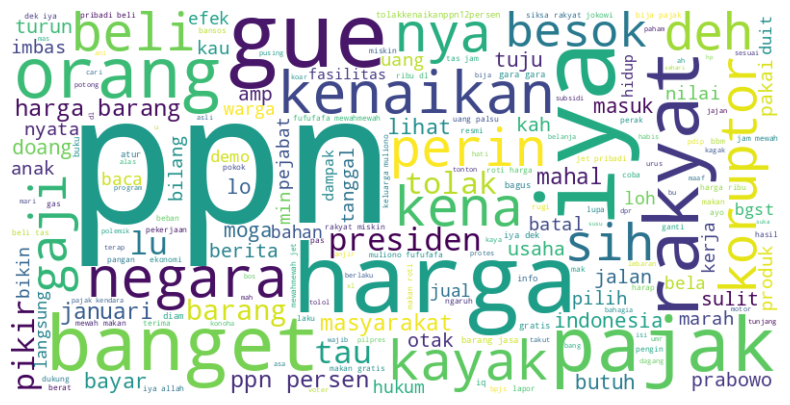

In [27]:
all_text = " ".join([" ".join(words) for words in data['remove_stopwords']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## Stop word again

Using NLTK

In [28]:
# Stopword indonesia
stop_words = set(stopwords.words("indonesian"))

In [29]:
stop_words.update(['yg', 'iya', 'nya', 'sih', 'ya', 
                   'ga', 'gak', 'gk', 'udah', 
                   'udh', 'nih', 'ini', 'si', 
                   'tau', 'tp', 'tapi', 'ya',
                   'deh', 'dong', 'jg', 'jgn',
                   'sdh', 'aja', 'saja', 'pun',
                   'kalo', 'klo', 'juga', 'jg',
                   'krn', 'karena', 'sm', 'dgn',
                   'lu', 'gw', 'gue', 'guee',
                   'emg', 'emang', 'emng', 'sih', 'kah', 'lo'])

In [30]:
def stop_w(token):
    tokens_filtered = [word for word in token if word.lower() not in stop_words]
    return tokens_filtered

In [31]:
data['remove_stop_words_nltk'] = data['remove_stopwords'].apply(lambda x: stop_w(x))
print("Tokenization (NLTK):", data['remove_stopwords'][0])
print("Stopword Removal:", data['remove_stop_words_nltk'][0])

Tokenization (NLTK): ['pagi', 'ppn', '12']
Stopword Removal: ['pagi', 'ppn', '12']


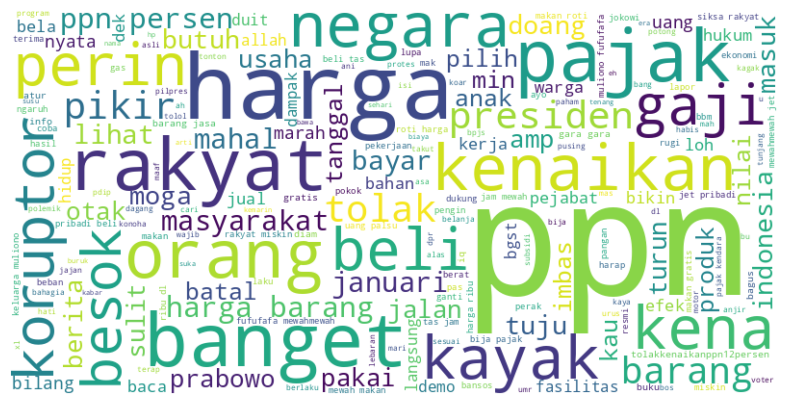

In [32]:
all_text = " ".join([" ".join(words) for words in data['remove_stop_words_nltk']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
